<a href="https://colab.research.google.com/github/arjun372/NE795-SciML/blob/main/HW1_Problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 5



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

a = 2
b = 80

def rosenbrock(x, y):
    return (a - x)**2 + b*(y - x**2)**2

def rosenbrock_grad(x, y):
    return np.array([-2*(a - x) - 4*b*x*(y - x**2), 2*b*(y - x**2)])

def rosenbrock_hessian(x, y):
    return np.array([[2*(a - 3*b*x**2 + 2*b*y), -4*b*x], [-4*b*x, 2*b]])

## 1. Gradient Descent Method

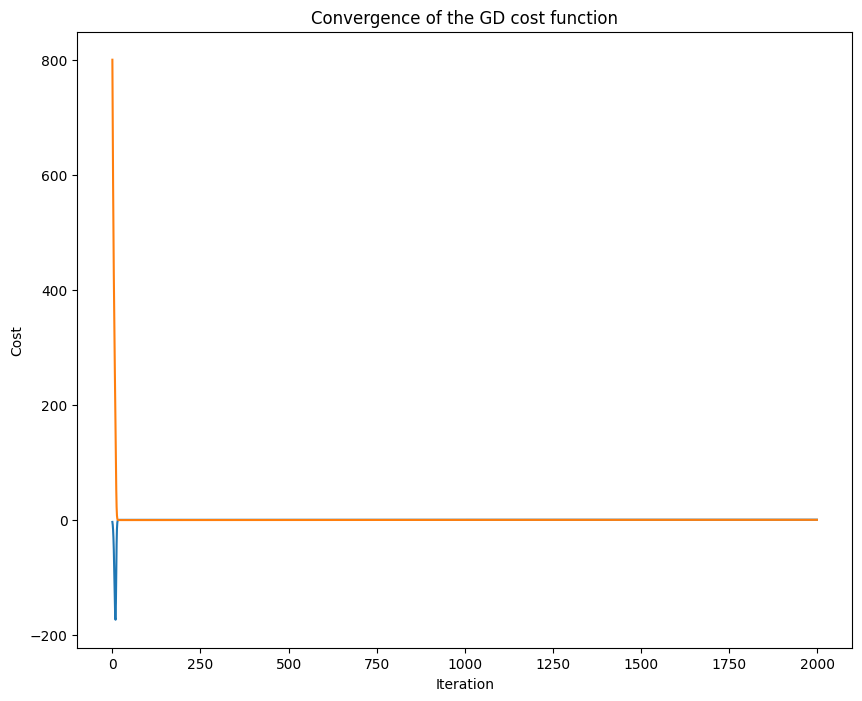

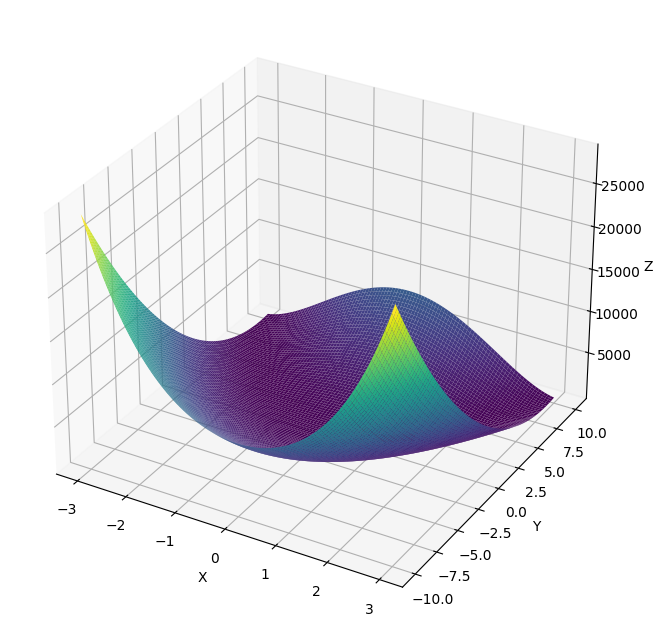

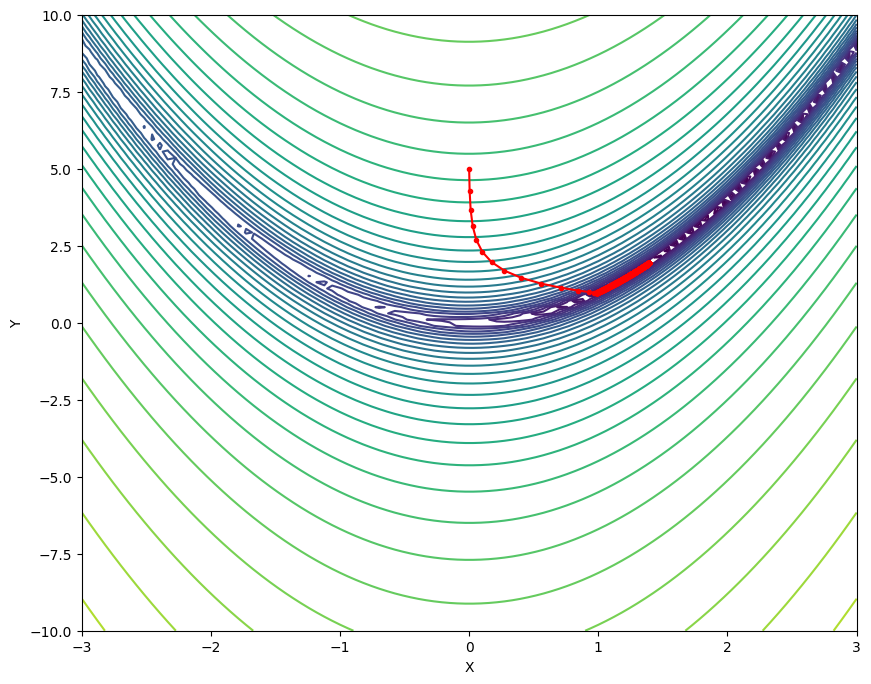

In [ ]:
x, y = 0, 5  # initial guess
lr = 0.0009  # learning rate
n_iter = 2000 # number of iterations
history = [(x, y)]  # to store the progression of (x, y)

cost = []
for _ in range(n_iter):
    grad = rosenbrock_grad(x, y)
    cost.append(grad)
    x, y = np.array([x, y]) - lr * grad
    history.append((x, y))

x_grid = np.linspace(-3.0, 3.0, 100)
y_grid = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = rosenbrock(X, Y)
history = np.array(history)

plt.figure(figsize=(10, 8))
plt.plot(cost)
plt.title('Convergence of the GD cost function')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.plot(history[:, 0], history[:, 1], rosenbrock(history[:, 0], history[:, 1]), 'r.-')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap='viridis')
plt.plot(history[:, 0], history[:, 1], 'r.-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 2. Newton's Method

         Current function value: 0.620464
         Iterations: 400
         Function evaluations: 404
         Gradient evaluations: 404
         Hessian evaluations: 400


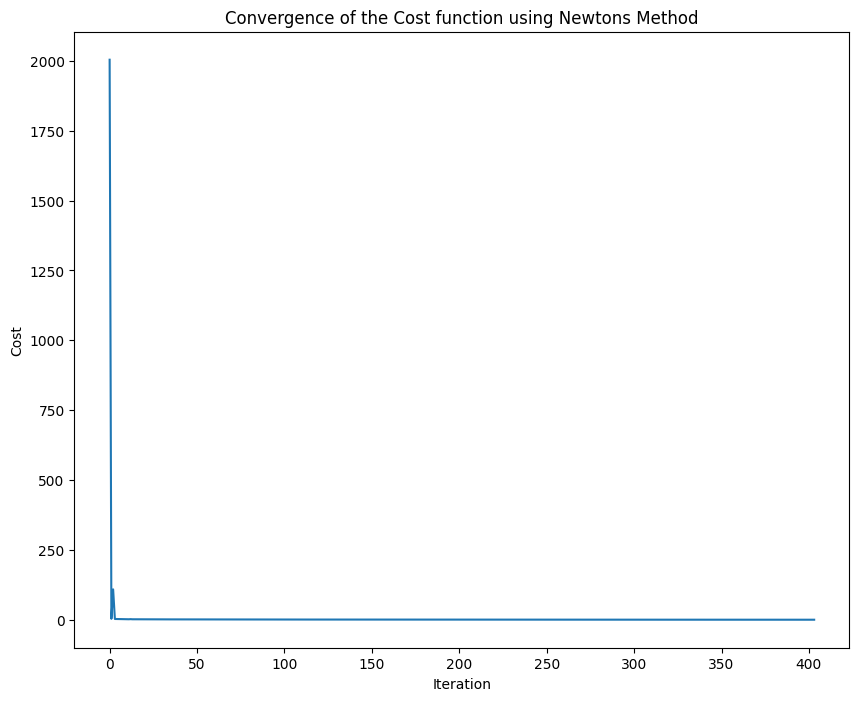

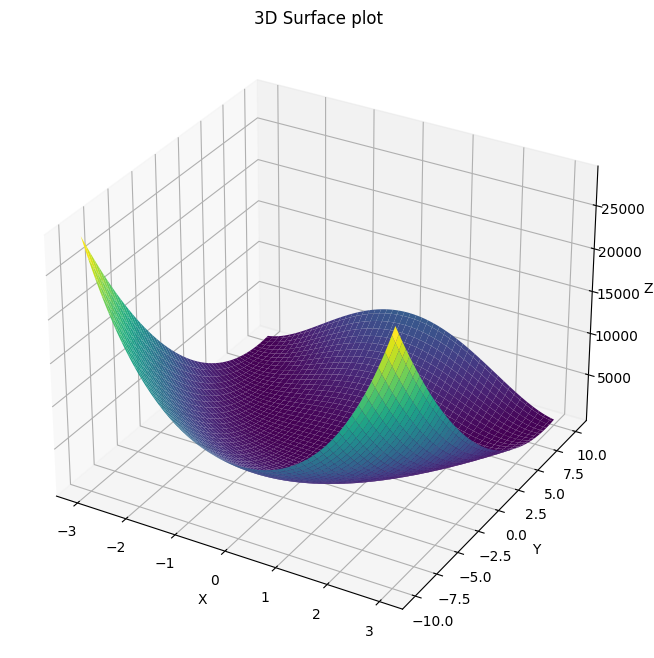

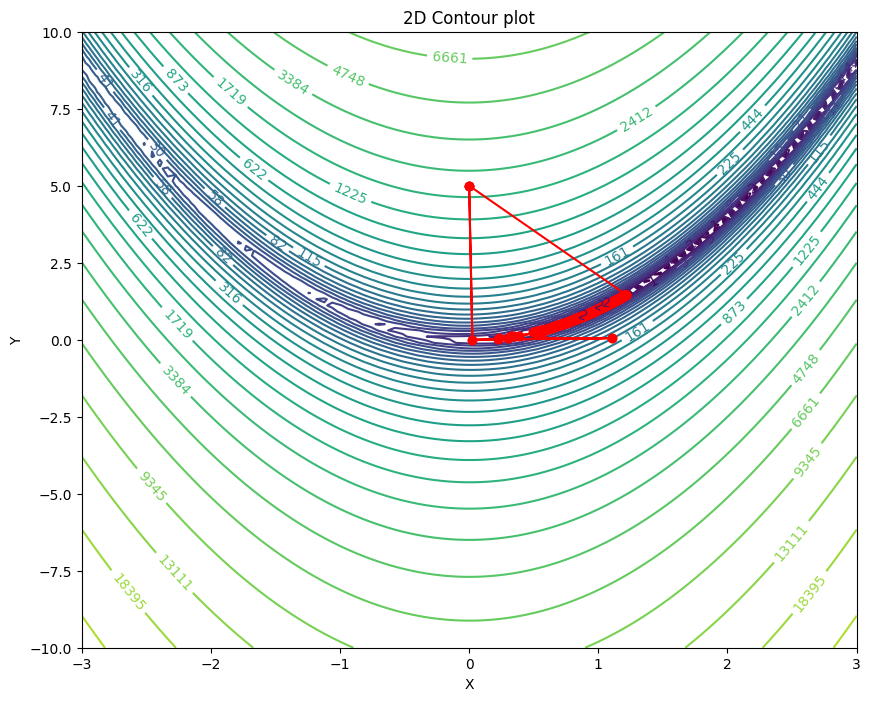

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

a = 2
b = 80
x0 = np.array([0, 5])


path = [x0]
costs = []

def rosenbrock_2(x):
    cost = (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2
    costs.append(cost)
    path.append(x)
    return cost

def rosenbrock_grad_2(x):
    return np.array([-2*(a - x[0]) - 4*b*x[0]*(x[1] - x[0]**2), 2*b*(x[1] - x[0]**2)])

def rosenbrock_hessian(x):
    return np.array([[2*(a - 3*b*x[0]**2 + 2*b*x[1]), -4*b*x[0]], [-4*b*x[0], 2*b]])

res = minimize(rosenbrock_2, x0, method='Newton-CG', jac=rosenbrock_grad_2, hess=rosenbrock_hessian, options={'xtol': 1e-8, 'disp': True})

plt.figure(figsize=(10, 8))
plt.plot(costs)
plt.title('Convergence of the Cost function using Newtons Method')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

X = np.linspace(-3, 3, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = (a - X) ** 2 + b * (Y - X ** 2) ** 2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

path_copy = path.copy()
path_array = np.array(path).T
ax.plot(path_array[0], path_array[1], [rosenbrock_2(p) for p in path_copy], color='r', marker='o')

ax.set_title('3D Surface plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap='viridis')

path_array = np.array(path).T
ax.plot(path_array[0], path_array[1], color='r', marker='o')
ax.set_title('2D Contour plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.clabel(contour, inline=1, fontsize=10)
plt.show()


# Analysis

Second-order methods like Newton's method can be more beneficial over first-order methods like gradient descent in the following instances:

1. Faster Convergence: Second-order methods often converge faster than first-order methods. This is because they take into account not just the gradient (first derivative) but also the curvature (second derivative) of the function. This additional information can help the algorithm take bigger steps when the function is flat and smaller steps when the function is steep, leading to faster convergence.

2. Better for Non-Convex Problems: Second-order methods can be more effective for non-convex problems. First-order methods like gradient descent can get stuck in local minima, while second-order methods can sometimes escape these traps.

3. Less Sensitive to Initial Conditions: Second-order methods are generally less sensitive to the choice of initial conditions. This can be beneficial when the initial guess is far from the optimal solution.

4. Less Sensitive to Learning Rate: In gradient descent, the learning rate needs to be carefully chosen to ensure convergence. Too small a learning rate can lead to slow convergence, while too large a learning rate can cause the algorithm to overshoot the minimum and diverge. Second-order methods, on the other hand, often do not require a learning rate to be specified, as they adaptively adjust the step size based on the curvature of the function.